# Chapter 2: A real example. Importing data and setting series

## Data Management


In this example we will show how we can import data from a csv and generate a model with several depositional series.

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np

In this case instead loading a geo_data object directly, we will create one. The main atributes we need to pass are:
- Extent: X min, X max, Y min, Y max, Z min, Z max
- Resolution: X,Y,Z

Additionaly we can pass the address to csv files (GeoModeller3D format) with the data.

In [2]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([696000,747000,6863000,6950000,-20000, 200],[50, 50, 50],
                         path_f = os.pardir+"/input_data/a_Foliations.csv",
                         path_i = os.pardir+"/input_data/a_Points.csv")

In [3]:
#gp.get_data(geo_data, 'interfaces').head()

You can visualize the points in 3D (work in progress)

In [4]:
gp.plot_data_3D(geo_data)

Or a projection in 2D:

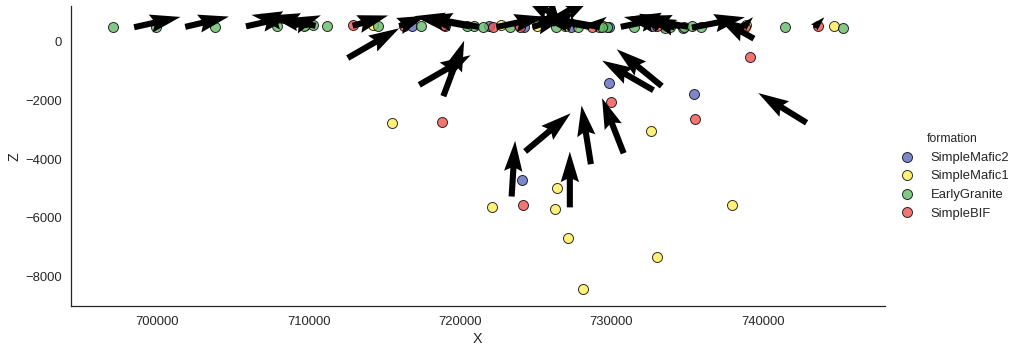

In [4]:
gp.plot_data(geo_data, direction='y')

This model consist in 3 different depositional series. This mean that only data in the same depositional series affect the interpolation. To select with formations belong to witch series we will use the ```set_data_series``` function which takes a python dictionary as input.

We can see the unique formations with:

In [4]:
gp.get_series(geo_data)

,Default serie
0,SimpleMafic2
1,SimpleBIF
2,SimpleMafic1
3,EarlyGranite


Setting the series we also give the specific order of the series. In python 3.6 and above the dictionaries conserve the key order so it is not necessary to give explicitly the order of the series. 

Notice as well that the order of the formations within each series is not relevant for the result but in case of being wrong can lead to confusing color coding (work in progress). 

In the representation given by `get_series` the elements get repeated but is only how Pandas print tables.

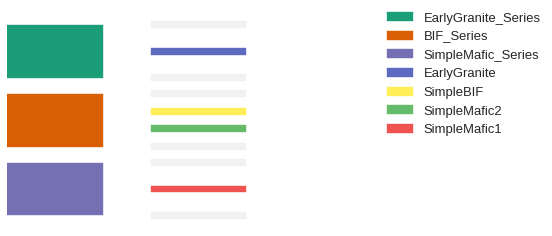

In [3]:
# Assigning series to formations as well as their order (timewise)
gp.set_series(geo_data, {"EarlyGranite_Series": 'EarlyGranite', 
                              "BIF_Series":('SimpleMafic2', 'SimpleBIF'),
                              "SimpleMafic_Series":'SimpleMafic1'}, 
                      order_series = ["EarlyGranite_Series",
                                      "BIF_Series",
                                      "SimpleMafic_Series"], verbose=1)

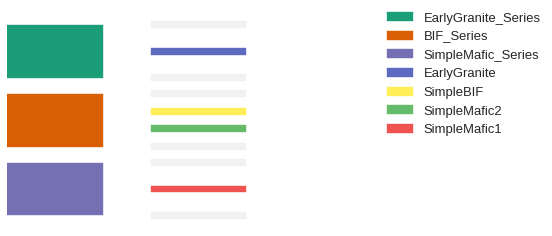

In [6]:
#%matplotlib qt5
gp.get_stratigraphic_pile(geo_data)

In [9]:
#geo_data.set_formation_number(['EarlyGranite', 'SimpleMafic2', 'SimpleBIF', 'SimpleMafic1'])

## Computing the model

Now as in the previous chapter we just need to create the interpolator object and compute the model.

In [4]:
interp_data = gp.InterpolatorInput(geo_data)

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32


In [5]:
lith_block, fault_block = gp.compute_model(interp_data)

In [ ]:
%debug

> /home/miguel/PycharmProjects/gempy/gempy/GemPy_f.py(511)compute_model()
    509     a_max = _np.argmax(potential_at_interfaces)
    510     potential_at_interfaces[a_min] = potential_at_interfaces[a_min] - potential_at_interfaces[a_min] * 0.05
--> 511     potential_at_interfaces[a_max] = potential_at_interfaces[a_max] + potential_at_interfaces[a_max] * 0.05
    512 
    513     interp_data.potential_at_interfaces = potential_at_interfaces

ipdb> a_min
1
ipdb> a_max
11
ipdb> potential_at_interfaces
array([[ 1.10940361,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.43489146,  2.43056798,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  4.68665504]], dtype=float32)


Now if we analyse the results we have a 3D array where the axis 0 represent the superposition of the series (potential fields). The color coding is working process yet.

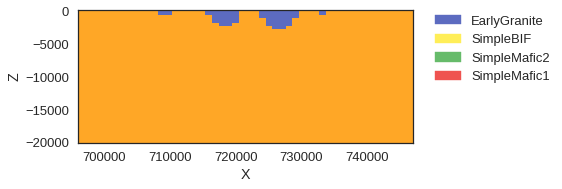

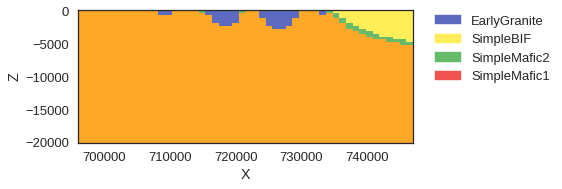

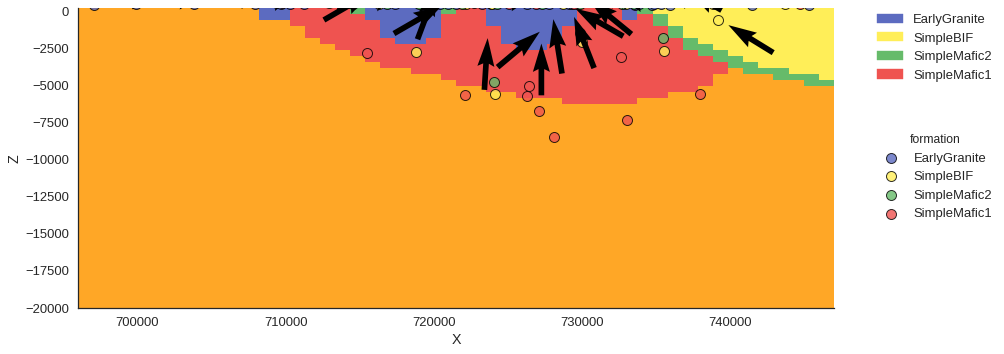

In [6]:
import matplotlib.pyplot as plt
gp.plot_section(geo_data, lith_block[0,0], 11)
plt.show()
gp.plot_section(geo_data, lith_block[1,0], 11)
plt.show()
gp.plot_section(geo_data, lith_block[2,0], 11, plot_data=True)
plt.show()

The axis 1 keeps the potential field:

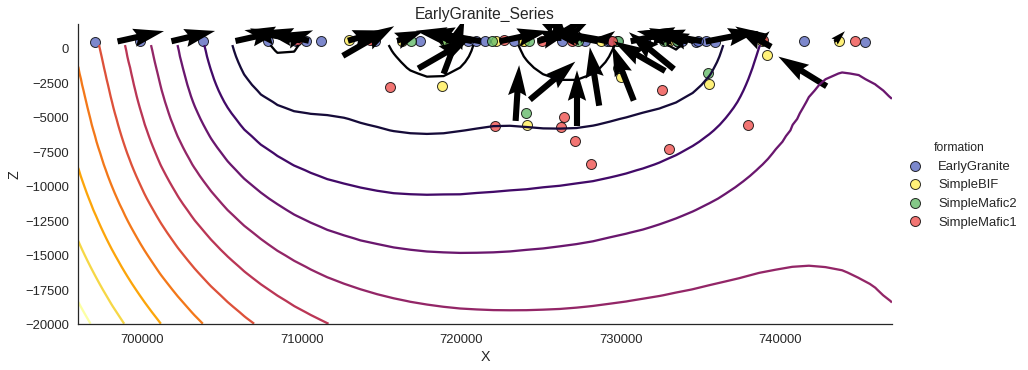

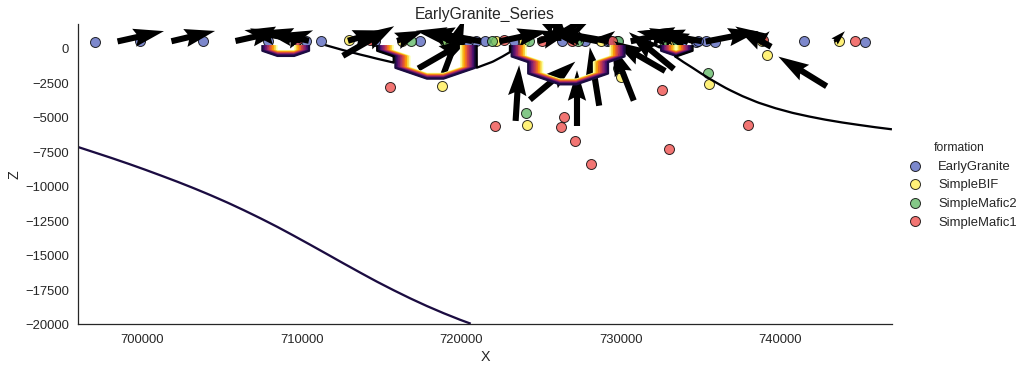

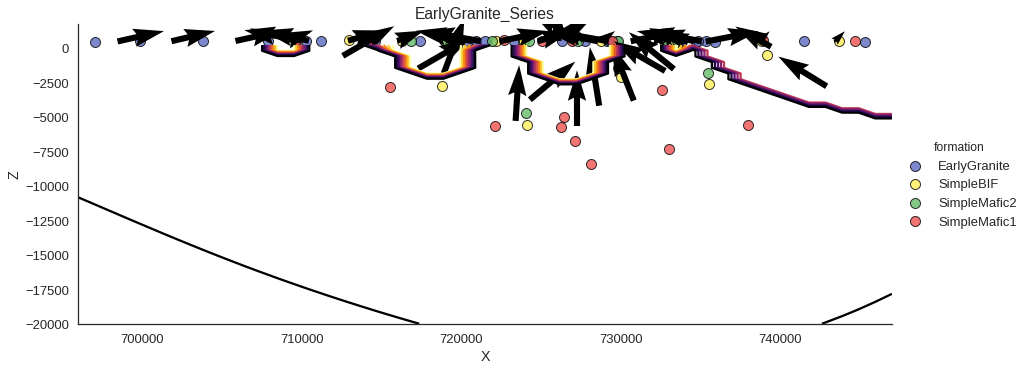

In [7]:
gp.plot_potential_field(geo_data, lith_block[0,1], 11, cmap='inferno_r')
plt.show()
gp.plot_potential_field(geo_data, lith_block[1,1], 11, cmap='inferno_r')
plt.show()
gp.plot_potential_field(geo_data, lith_block[2,1], 11, cmap='inferno_r')
plt.show()

And the axis 2 keeps the faults network that in this model since there is not faults does not represent anything.

Additionally with can export the blocks to vtk in order to visualize them in Paraview. We are working in visualization in place as well.

In [15]:
gp.export_vtk_rectilinear(geo_data, lith_block[2,0], path=None)

In [6]:
ver, sim = gp.get_surfaces(interp_data,lith_block[2,1], None, original_scale=True)

In [7]:
gp.plot_surfaces_3D(geo_data, ver, sim, alpha=1)

In [24]:
interp_data.potential_at_interfaces

array([[ 1.10930002,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.56304359,  2.55849266,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  4.68665504]], dtype=float32)

In [8]:
interp_data.potential_at_interfaces

array([[ 1.11051297,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.55725169,  2.56180716,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  4.68554449]], dtype=float32)